### HW5. Author Andrii Zadaianchuk

In [1]:
import scipy.io
from matplotlib import pyplot as plt
import numpy as np

In [44]:
X_train=scipy.io.loadmat('mnist_train.mat')['train']
X_test=scipy.io.loadmat('mnist_test.mat')['test']
def change_format(data):
    
    N=0
    k=0
    for i in range(10):
        N=N+data[0,i].shape[1]
        
    data_changed=np.zeros((N,28,28))
    labels=np.zeros(N)
    
    for i in range(10):
        N_i=data[0,i].shape[1]
        for j in range(N_i):
            data_changed[k+j,:,:]=data[0,i][:,j].reshape((28,28)).T
            labels[k+j]=i
        k=k+N_i
    return data_changed,labels
            
        
        
X_train,y_train=change_format(X_train)
X_test,y_test=change_format(X_test)
inds=[y_train==i for i in range(10)]
X_train_2=X_train[ind[0]|ind[9]]
y_train_2=y_train[ind[0]|ind[9]]


m_1=X_train[ind[0]].mean(axis=0)
m_0=X_train[ind[9]].mean(axis=0)
var_1=X_train[ind[0]].var(axis=0)
var_0=X_train[ind[9]].var(axis=0)

Average 1

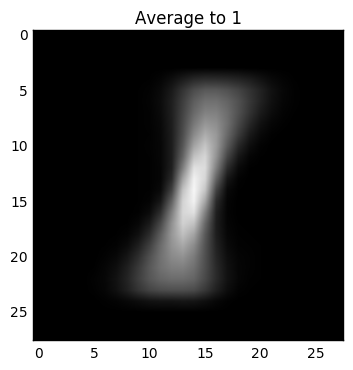

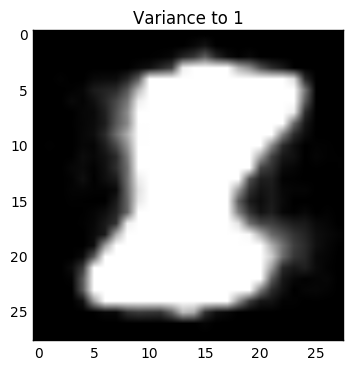

In [43]:
plt.imshow(m_1, cmap='gray', vmin = 0, vmax = 255)
plt.title("Average to 1")
plt.show()
plt.imshow(var_1, cmap='gray', vmin = 0, vmax = 255)
plt.title("Variance to 1")
plt.show()

Average 0

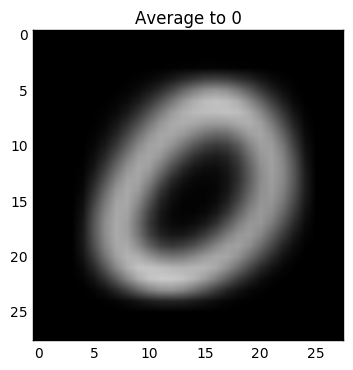

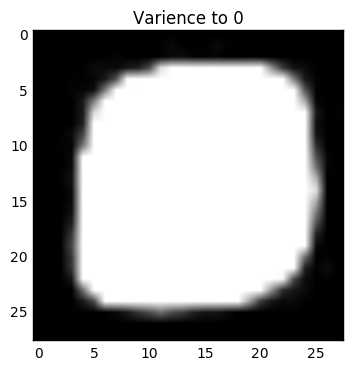

In [42]:
plt.imshow(m_0, cmap='gray', vmin = 0, vmax = 255)
plt.title("Average to 0")
plt.show()

plt.imshow(var_0, cmap='gray', vmin = 0, vmax = 255)
plt.title("Variance to 0")
plt.show()

In [114]:
X_train_2=X_train_2-X_train_2.mean(axis=0)
X_train_2_flat=X_train_2.reshape(-1,28*28)
def PCA(X):
    cov=np.matmul(X.T,X)/X.shape[0]
    cov2=np.cov(X.T)
    U, s, V=np.linalg.svd(cov)
    return (U,s,V)
    
(U,s,V)=PCA(X_train_2_flat)

def get_number_of_components(percent,s):
    for i,x in enumerate(s.cumsum()/s.sum()):
        if x>percent:
            return i,x 
        
m=get_number_of_components(0.9,s)[0]

print "Number of components to explain 90% of variance:",m

def get_error(m,U): 
    U_m=U[:,:m]
    reconstraction_error=((X_train_2_flat-np.matmul(np.matmul(X_train_2_flat,U_m),U_m.T))**2).sum()/(X_train_2_flat**2).sum()
    return reconstraction_error

    print "Reconstraction error:", get_error(m,U)

print "Explained varivance for 2 components:", s.cumsum()[1]/s.sum(),"Reconstraction error for two components:", get_error(2,U)


Number of components to explain 90% of variance: 48
Explained varivance for 2 components: 0.411405600656 Reconstraction error for two components: 0.588594399344


In [108]:
X=np.matmul(X_train_2_flat, U[:,:2])
y=y_train_2

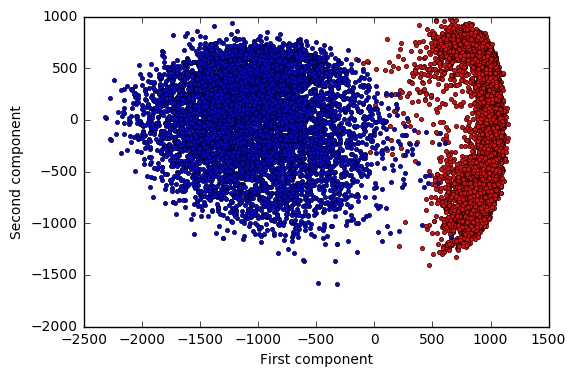

In [109]:
plt.plot(X[y==0][:,0],X[y==0][:,1],'ro', markersize=3)
plt.xlabel("First component")
plt.ylabel("Second component")
plt.plot(X[y==9][:,0],X[y==9][:,1],'bo',markersize=3)
plt.show()


In [ ]:
X[y==0].mean()

In [89]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi